In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [3]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,

)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time



In [4]:
# ema_logging.log_to_stderr(ema_logging.INFO)

# Define model
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [6]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [7]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('A.1 Total Costs', variable_name=('A.1_Expected Annual Damage', 'A.1_Dike Investment Costs'), function=<function sum_over at 0x00000250CEF56840>)
ScalarOutcome('A.1_Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths',), function=<function sum_over at 0x00000250CEF56840>)
ScalarOutcome('A.2 Total Costs', variable_name=('A.2_Expected Annual Damage', 'A.2_Dike Investment Costs'), function=<function sum_over at 0x00000250CEF56840>)
ScalarOutcome('A.2_Expected Number of Deaths', variable_name=('A.2_Expected Number of Deaths',), function=<function sum_over at 0x00000250CEF56840>)
ScalarOutcome('A.3 Total Costs', variable_name=('A.3_Expected Annual Damage', 'A.3_Dike Investment Costs'), function=<function sum_over at 0x00000250CEF56840>)
ScalarOutcome('A.3_Expected Number of Deaths', variable_name=('A.3_Expected Number of Deaths',), function=<function sum_over at 0x00000250CEF56840>)
ScalarOutcome('A.4 Total Costs', variable_name=('A.4_Expected Annual Dama

In [8]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=4)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 50 scenarios * 4 policies * 1 model(s) = 200 experiments
100%|████████████████████████████████████████| 200/200 [00:26<00:00,  7.43it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [9]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,97,251.922240,1.0,0.244887,177.440559,10.0,0.955284,226.938511,1.0,0.373304,...,10,8,5,8,9,7,2,4,0,dikesnet
1,73,235.612446,10.0,0.497987,43.470681,10.0,0.557209,44.491490,1.0,0.817210,...,10,8,5,8,9,7,2,5,0,dikesnet
2,36,300.549102,1.0,0.042998,143.111523,10.0,0.214907,72.553449,1.0,0.534529,...,10,8,5,8,9,7,2,6,0,dikesnet
3,106,56.620653,1.0,0.935841,133.744163,10.0,0.919461,201.629914,1.0,0.978067,...,10,8,5,8,9,7,2,7,0,dikesnet
4,44,79.369641,1.0,0.660890,259.587277,1.0,0.653033,35.258939,1.0,0.947224,...,10,8,5,8,9,7,2,8,0,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,100,174.682899,1.5,0.060834,223.832377,1.0,0.302459,163.700452,1.5,0.411547,...,7,2,1,4,1,3,3,49,3,dikesnet
196,119,242.454377,1.0,0.832848,32.047114,1.5,0.111053,296.182314,1.0,0.326880,...,7,2,1,4,1,3,3,50,3,dikesnet
197,53,270.470685,1.0,0.146804,153.666044,10.0,0.538422,122.275082,1.0,0.491370,...,7,2,1,4,1,3,3,51,3,dikesnet
198,70,273.877373,1.0,0.720431,104.162590,10.0,0.338412,85.542251,1.0,0.923146,...,7,2,1,4,1,3,3,52,3,dikesnet


In [10]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,1.674211e+08,0.00000,1.676904e+08,0.0,1.177733e+08,0.000000,6.319183e+07,0.000000,1.961975e+08,0.0,7.643000e+08,0.000000
1,1.674211e+08,0.00000,1.676904e+08,0.0,1.177733e+08,0.000000,6.319183e+07,0.000000,1.961975e+08,0.0,7.643000e+08,0.000000
2,1.674211e+08,0.00000,1.676904e+08,0.0,1.177733e+08,0.000000,6.319183e+07,0.000000,1.961975e+08,0.0,7.643000e+08,0.000000
3,1.674211e+08,0.00000,1.676904e+08,0.0,1.177733e+08,0.000000,6.319183e+07,0.000000,1.961975e+08,0.0,7.643000e+08,0.000000
4,1.674211e+08,0.00000,1.676904e+08,0.0,1.177733e+08,0.000000,6.319183e+07,0.000000,1.961975e+08,0.0,7.643000e+08,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
195,9.134723e+07,0.00021,2.895041e+08,0.0,3.609934e+07,0.000874,3.209061e+07,0.000000,9.791987e+07,0.0,1.100500e+09,224.153973
196,8.906825e+07,0.00000,2.895041e+08,0.0,4.648623e+07,0.002941,3.209061e+07,0.000000,9.791987e+07,0.0,1.100500e+09,643.042973
197,8.906825e+07,0.00000,2.895041e+08,0.0,3.278481e+07,0.000359,3.209061e+07,0.000000,9.791987e+07,0.0,1.100500e+09,76.326799
198,8.906825e+07,0.00000,2.895041e+08,0.0,3.139880e+07,0.000000,3.209061e+07,0.000000,9.791987e+07,0.0,1.100500e+09,0.000000


In [11]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [12]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 12 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:47<00:00,  6.35it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [13]:
experiments, outcomes = results

In [14]:
# only works because we have scalar outcomes
df =pd.DataFrame(outcomes)
df

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,5.397251e+07,0.000000,3.373478e+07,0.027943,1.725742e+08,0.265884,6.270462e+07,0.024895,7.732544e+08,0.572953,253800000.0,0.0
1,5.397251e+07,0.000000,1.200853e+08,0.152470,3.147481e+08,0.755634,6.652032e+05,0.000422,0.000000e+00,0.000000,253800000.0,0.0
2,5.397251e+07,0.000000,9.540354e+06,0.012046,1.190634e+08,0.272785,6.668802e+07,0.039203,8.536858e+08,0.915469,253800000.0,0.0
3,5.397251e+07,0.000000,9.292787e+08,0.796597,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
4,5.397251e+07,0.000000,9.435417e+06,0.011799,1.926980e+08,0.434220,0.000000e+00,0.000000,0.000000e+00,0.000000,253800000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000e+00,0.000000,1.188724e+07,0.016953,3.233051e+07,0.009512,5.894033e+07,0.036731,0.000000e+00,0.000000,369700000.0,0.0
296,0.000000e+00,0.000000,2.656117e+08,0.191102,2.879840e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,369700000.0,0.0
297,0.000000e+00,0.000000,1.600174e+07,0.017389,2.879840e+07,0.000000,4.608062e+07,0.023861,2.333588e+07,0.023231,369700000.0,0.0
298,4.983787e+07,0.041933,6.943295e+08,0.750581,2.879840e+07,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,369700000.0,0.0


<Axes: >

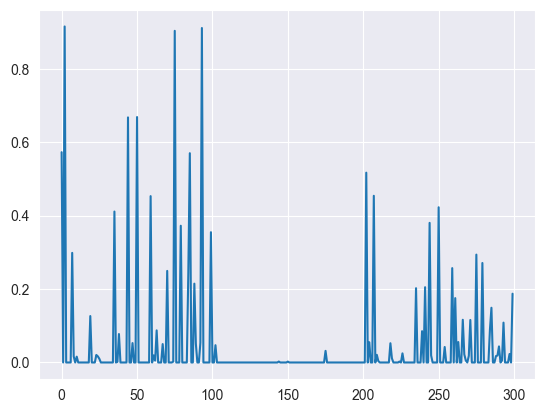

In [15]:
df["A.5_Expected Number of Deaths"].plot() 